In [15]:
import seaborn as sns
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
total_data.head(1000)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [16]:
total_data["date"].iloc[0][8:10]

'03'

In [17]:
# for i in range(len(total_data)):
#     total_data["year"] = total_data["date"].iloc[i][:4]
#     total_data["month"] = total_data["date"].iloc[i][5:7]
#     total_data["day"] = total_data["date"].iloc[i][8:10]

# total_data["date"] = pd.to_datetime(total_data[["year", "month", "day"]])
# total_data = total_data.set_index("date")

# total_data


In [18]:
# total_data = total_data.drop("year", axis=1)
# total_data = total_data.drop("month", axis=1)
# total_data = total_data.drop("day", axis=1)


In [19]:
total_data = total_data.set_index(total_data["date"])
ts = total_data["sales"]
ts

date
2022-09-03 17:10:08.079328      55.292157
2022-09-04 17:10:08.079328      53.803211
2022-09-05 17:10:08.079328      58.141693
2022-09-06 17:10:08.079328      64.530899
2022-09-07 17:10:08.079328      66.013633
                                 ...     
2023-08-30 17:10:08.079328     989.600354
2023-08-31 17:10:08.079328     994.987326
2023-09-01 17:10:08.079328     995.814415
2023-09-02 17:10:08.079328     997.350214
2023-09-03 17:10:08.079328    1000.482785
Name: sales, Length: 366, dtype: float64

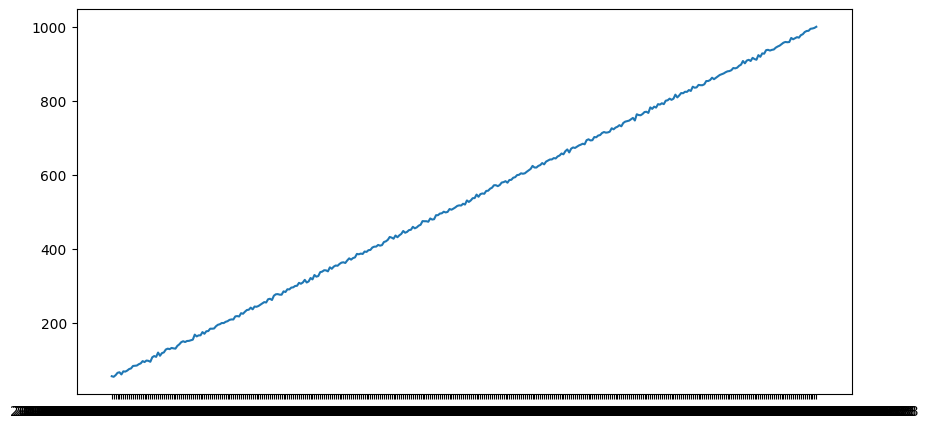

In [20]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

plt.plot(ts)

plt.show()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decided on a week since I don't see any larger seasonal trends
decomposition = seasonal_decompose(ts, period = 7)
decomposition

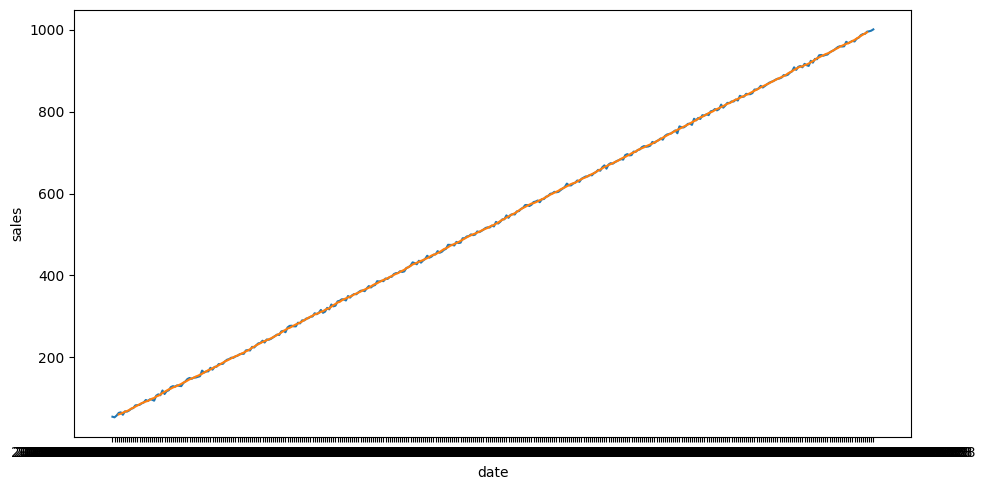

In [22]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

#Very close fitting trend line

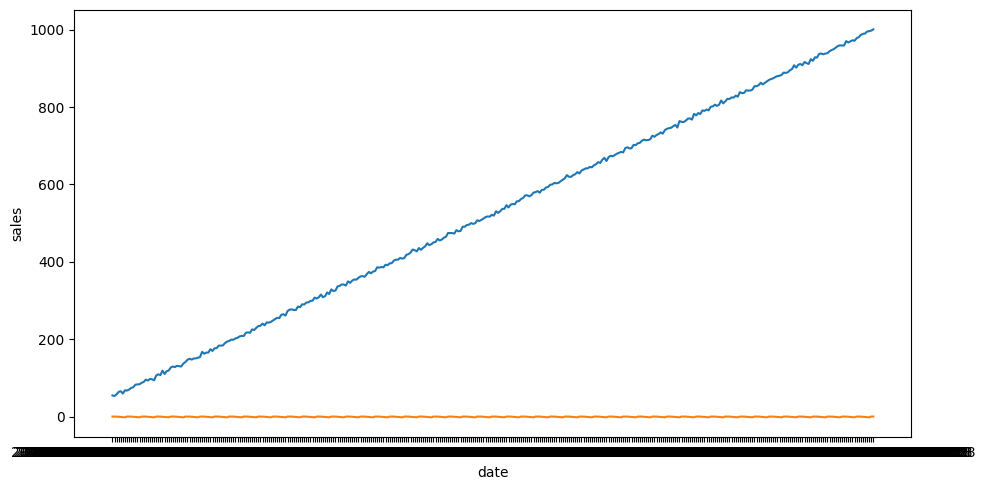

In [23]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

#Basically no seasonality

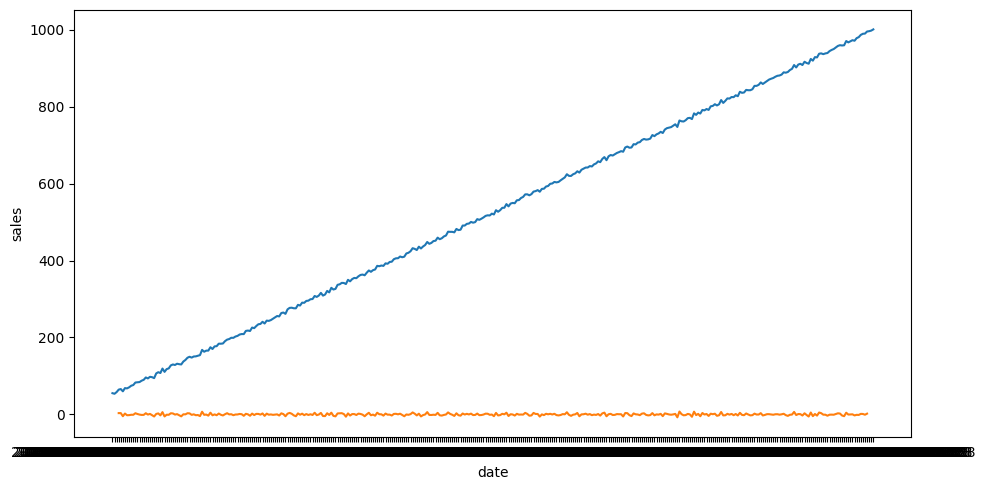

In [24]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()
#Not very noisy :)

In [25]:
#The trend is monstanly upward. This has a moving average and is not stationary
#The Tensor is by day

In [26]:
from statsmodels.tsa.stattools import adfuller

#The line of code below seems to break my time series
# ts_stationary = ts.diff().dropna()
# ts_stationary

NameError: name 'ts_stationary' is not defined

In [27]:
import pmdarima as pdarm

model = pdarm.auto_arima(ts, seasonal = False, trace = True, m=7)

/usr/local/python/3.12.1/lib/python3.12/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 an

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.21 sec


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.16 sec


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.06 sec


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.052 seconds


In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Fri, 31 Jan 2025   AIC                           1839.552
Time:                        00:05:15   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
ts.index

Index(['2022-09-03 17:10:08.079328', '2022-09-04 17:10:08.079328',
       '2022-09-05 17:10:08.079328', '2022-09-06 17:10:08.079328',
       '2022-09-07 17:10:08.079328', '2022-09-08 17:10:08.079328',
       '2022-09-09 17:10:08.079328', '2022-09-10 17:10:08.079328',
       '2022-09-11 17:10:08.079328', '2022-09-12 17:10:08.079328',
       ...
       '2023-08-25 17:10:08.079328', '2023-08-26 17:10:08.079328',
       '2023-08-27 17:10:08.079328', '2023-08-28 17:10:08.079328',
       '2023-08-29 17:10:08.079328', '2023-08-30 17:10:08.079328',
       '2023-08-31 17:10:08.079328', '2023-09-01 17:10:08.079328',
       '2023-09-02 17:10:08.079328', '2023-09-03 17:10:08.079328'],
      dtype='object', name='date', length=366)

In [43]:
type(ts.index)
ts.index = pd.to_datetime(ts.index)
# ts

In [42]:
forecast = model.predict(60)

#Trying to modify the date column so that it will let me graph it below
# forecast.index = pd.to_datetime(forecast.index)

type(forecast.index)
# forecast

#Values do seem to match up with reasonable expectations

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


pandas.core.indexes.datetimes.DatetimeIndex

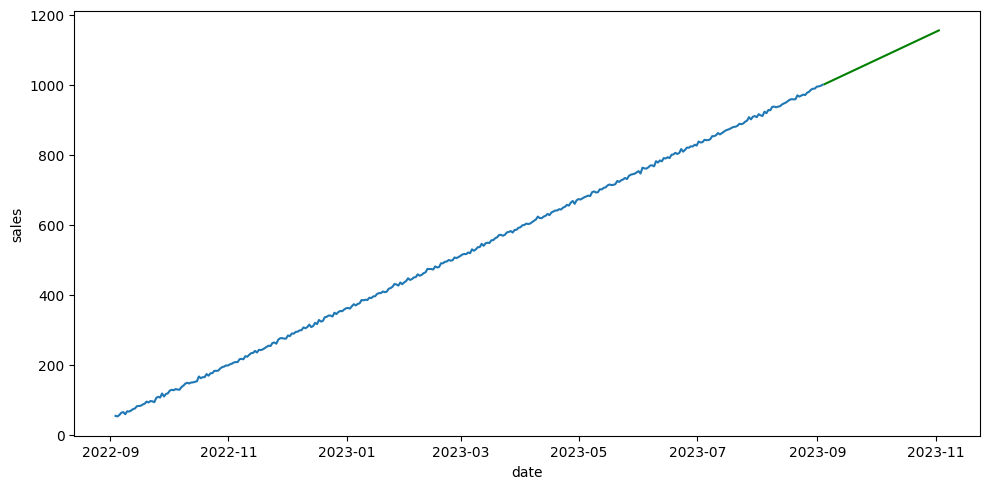

In [44]:

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()
plt.show()




In [45]:
from pickle import dump

dump(model, open("sales-ARIMA-pn.sav", "wb"))